# RNN

In [1]:
#Importing everything needed
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
#Created a class which a produces a sine wave as data
class TimeSeriesData():
    
    def __init__(self, num_points, xmin, xmax):
        self.xmin = xmin
        self.xmax = xmax
        self.num_points = num_points
        self.resolution = (xmax-xmin)/num_points
        self.x_data = np.linspace(xmin, xmax, num_points)
        self.y_true = np.sin(self.x_data)
    
    #Y true values
    def ret_true(self, x_series):
        return np.sin(x_series)
    
    #Get next batch
    def next_batch(self, batch_size, steps, return_batch_ts=False):
        
        rand_start = np.random.rand(batch_size,1)
        
        ts_start = rand_start * (self.xmax - self.xmin - (steps * self.resolution))
        
        batch_ts = ts_start + np.arange(0.0, steps+1) * self.resolution
        
        y_batch = np.sin(batch_ts)
        
        if return_batch_ts:
            return y_batch[:,:-1].reshape(-1, steps, 1), y_batch[:,1:].reshape(-1, steps, 1), batch_ts
        else:
            y_batch[:,:-1].reshape(-1, steps, 1), y_batch[:,1:].reshape(-1, steps, 1)

In [3]:
#Create a data with 250 point from 0 to 10
ts_data = TimeSeriesData(250, 0, 10)

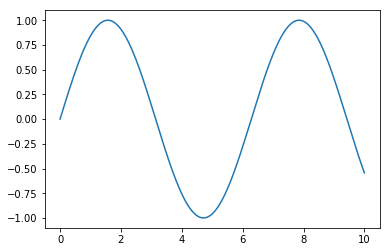

In [4]:
#Plot the data
plt.plot(ts_data.x_data, ts_data.y_true)

In [5]:
#Number of steps
num_time_steps = 30

In [6]:
#Get the nest batch, ts being x and ys being the wave
y1, y2, ts = ts_data.next_batch(1, num_time_steps, True)

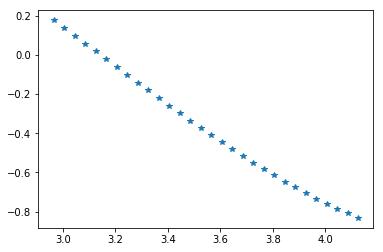

In [7]:
#Plot the batch
plt.plot(ts.flatten()[1:], y2.flatten(), '*')

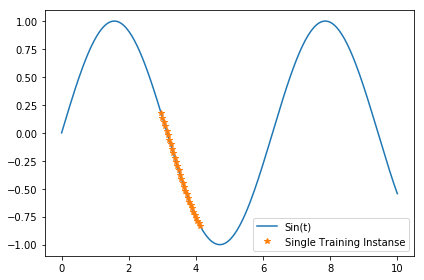

In [8]:
#Visualize the data
plt.plot(ts_data.x_data, ts_data.y_true, label='Sin(t)')
plt.plot(ts.flatten()[1:], y2.flatten(), '*', label='Single Training Instanse')
plt.legend()
plt.tight_layout()